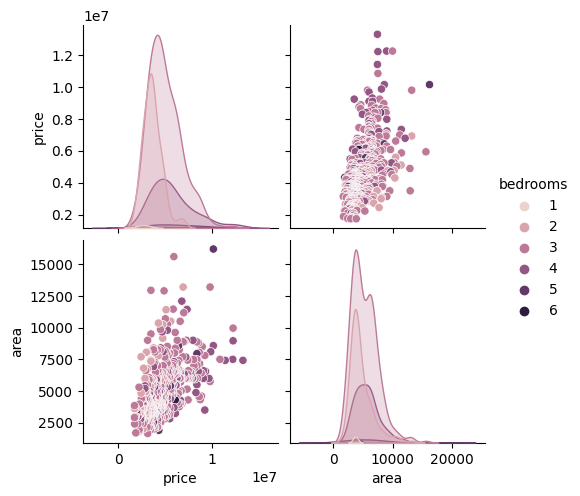

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

houses_ds = pd.read_csv('Housing.csv')

houses_ds.head()
houses_ds.columns
houses_ds[['price', 'area', 'bedrooms', 'bathrooms']]

sns.pairplot(
    houses_ds,
    vars=['price', 'area'],
    hue='bedrooms'
)

In [3]:
#**Linear regression hypothesis**
from sklearn.linear_model import LinearRegression

X = np.array(houses_ds[['area', 'bedrooms', 'bathrooms']])
y = np.array(houses_ds['price'])

def h(w, X):
    y_pred = np.dot(X, w)
    return y_pred

reg = LinearRegression().fit(X,y)
print('Коефіцієнти sklearn моделі:', reg.coef_)

params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('Коефіцієнти аналітичної моделі:', params)


Коефіцієнти моделі: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Коефіцієнти моделі: [3.72448352e+02 3.68974672e+05 1.37031315e+06]


In [13]:
# **Linear regression**

def h(w_0, w_1, w_2, w_3, x1, x2, x3):
    return w_0 + w_1*x1 + w_2*x2 + w_3*x3


def loss_function(df, w_0, w_1, w_2, w_3):
    m = houses_ds.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3)-y)**2
    return cost/(2*m)

In [14]:
# **Gradient descent**

def grad_step(w_0, w_1, w_2, w_3, grad_w_0, grad_w_1, grad_w_2, grad_w_3, learning_rate=0.001):
    w_0 -= learning_rate*grad_w_0
    w_1 -= learning_rate*grad_w_1
    w_2 -= learning_rate*grad_w_2
    w_3 -= learning_rate*grad_w_3
    return w_0, w_1, w_2, w_3


def grad_w_0(df, w_0, w_1, w_2, w_3):
    m = houses_ds.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3)-y)
    return cost/m


def grad_w_1(df, w_0, w_1, w_2, w_3):
    m = houses_ds.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3)-y)*x1
    return cost/m


def grad_w_2(df, w_0, w_1, w_2, w_3):
    m = houses_ds.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3)-y)*x2
    return cost/m


def grad_w_3(df, w_0, w_1, w_2, w_3):
    m = houses_ds.shape[0]
    cost = 0
    for x1, x2, x3, y in zip(df.area, df.bedrooms, df.bathrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3)-y)*x3
    return cost/m


def grad_descent(w_0, w_1, w_2, w_3, df, num_iter, learning_rate=0.001, epsilon=0.0000001):
    loss = loss_function(df, w_0, w_1, w_2, w_3)
    loss_history = [loss]

    for i in range(num_iter):
        d_w_0 = grad_w_0(df, w_0, w_1, w_2, w_3)
        d_w_1 = grad_w_1(df, w_0, w_1, w_2, w_3)
        d_w_2 = grad_w_2(df, w_0, w_1, w_2, w_3)
        d_w_3 = grad_w_3(df, w_0, w_1, w_2, w_3)
        w_0, w_1, w_2, w_3 = grad_step(
            w_0, w_1, w_2, w_3, d_w_0, d_w_1, d_w_2, d_w_3, learning_rate=learning_rate)
        loss = loss_function(df, w_0, w_1, w_2, w_3)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        loss_history.append(loss)
    return w_0, w_1, w_2, w_3, loss_history

In [15]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/value_range
        result.append(norm_x)
    return result


norm_df = pd.DataFrame()
norm_df['price'] = normalization(houses_ds.price)
norm_df['area'] = normalization(houses_ds.area)
norm_df['bedrooms'] = normalization(houses_ds.bedrooms)
norm_df['bathrooms'] = normalization(houses_ds.bathrooms)

In [180]:
# **Model training**

w_0, w_1, w_2, w_3, loss_history = grad_descent(
    0.0, 0.0, 0.0, 0.0, norm_df, 10000, learning_rate=0.1)

6.017612504115061e-17

In [18]:
from sklearn.linear_model import LinearRegression
X = np.array([norm_df.area, norm_df.bedrooms, norm_df.bathrooms]).T
y = np.array(norm_df.price)
reg = LinearRegression().fit(X, y)

reg.score(X, y)
reg.intercept_
reg.coef_

array([0.47714269, 0.17611257, 0.36001286])

In [181]:
# **Results**
print(f"Analytic solution: {w_0} + {w_1}*area + {w_2}*bedrooms + {w_3}*bathrooms")
print(f"Framework solution: {reg.intercept_} + {reg.coef_[0]}*area + {reg.coef_[1]}*bedrooms + {reg.coef_[2]}*bathrooms")

Analytic solution: 6.017612504115061e-17 + 0.445206593232395*area + 0.18763901556010493*bedrooms + 0.35656399992812066*bathrooms
Framework solution: 7.014204135081996e-17 + 0.4771426895812342*area + 0.17611256873124753*bedrooms + 0.36001285656909066*bathrooms


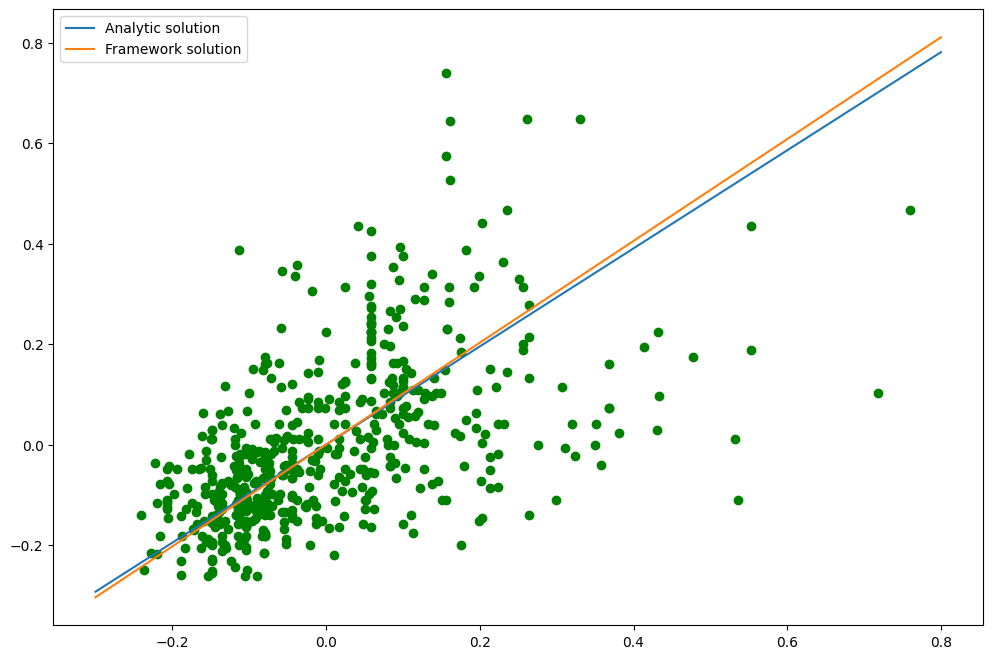

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(norm_df.area, norm_df.price, 'go')
x = np.linspace(-0.3, 0.8, 500)
plt.plot(x, h(w_0, w_1, w_2, w_3, x, x, x), label='Analytic solution')
plt.plot(x, h(reg.intercept_, reg.coef_[0], reg.coef_[
         1], reg.coef_[2], x, x, x), label='Framework solution')
plt.legend()
plt.show()